In [1]:

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer




In [2]:
#Import data

train = pd.read_csv('train.csv')
trainc = train
trainc.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#one_hot_encoded_training_predictors = pd.get_dummies(train)

In [4]:
#Predictor column
train_y = train.SalePrice

In [5]:
#Using features except those with object as data types
predc = train.drop(['SalePrice'], axis=1)
train_X = predc.select_dtypes(exclude=['object'])
train_X.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
dtype: object

In [6]:
#Replace NaN with column median 
train_X.fillna(train_X.median(),inplace=True)

/home/carlosluz/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,480,40,30,0,320,0,0,700,10,2009
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,636,255,57,0,0,0,0,0,8,2007
7,8,60,69.0,10382,7,6,1973,1973,240.0,859,...,484,235,204,228,0,0,0,350,11,2009
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,468,90,0,205,0,0,0,0,4,2008
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,205,0,4,0,0,0,0,0,1,2008


In [7]:
missing_val_count_by_column = (train_X.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [8]:
#Create first model 
model1 = RandomForestRegressor(n_estimators=100,min_samples_split=6,max_leaf_nodes=5000,oob_score=True)
model1

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=5000,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [9]:
model = model1.fit(train_X,train_y)
model.score(train_X,train_y)
sc1 = cross_val_score(model1, train_X,train_y)
sc1.mean()

0.84878131340794638

In [10]:
from tabulate import tabulate
#Feature importance
headers = ['name','score']
values = sorted(zip(train_X.columns,model.feature_importances_),key=lambda x: x[1]*-1)
print(tabulate(values,headers,tablefmt='plain'))

name                 score
OverallQual    0.586806
GrLivArea      0.113762
TotalBsmtSF    0.0419376
2ndFlrSF       0.0404292
BsmtFinSF1     0.0318569
1stFlrSF       0.0262511
GarageArea     0.0231102
GarageCars     0.0205145
LotArea        0.0138714
YearBuilt      0.0120549
YearRemodAdd   0.00937179
LotFrontage    0.00802669
TotRmsAbvGrd   0.0079182
OverallCond    0.00582238
BsmtUnfSF      0.00545106
WoodDeckSF     0.00522367
FullBath       0.00516475
GarageYrBlt    0.00513857
Id             0.00509429
OpenPorchSF    0.00500771
MasVnrArea     0.00489807
Fireplaces     0.00465851
MoSold         0.00391179
MSSubClass     0.00232133
BedroomAbvGr   0.00207691
BsmtFullBath   0.00126646
YrSold         0.00119327
BsmtHalfBath   0.00116138
HalfBath       0.00107963
ScreenPorch    0.00102329
EnclosedPorch  0.000997694
BsmtFinSF2     0.000772737
KitchenAbvGr   0.000617043
3SsnPorch      0.000521975
PoolArea       0.000496516
MiscVal        0.000106542
LowQualFinSF   8.34408e-05


In [11]:
co = ['feature','score']
fimp = pd.DataFrame(data=values,columns=co)
fimp

,feature,score
0,OverallQual,0.586806
1,GrLivArea,0.113762
2,TotalBsmtSF,0.041938
3,2ndFlrSF,0.040429
4,BsmtFinSF1,0.031857
5,1stFlrSF,0.026251
6,GarageArea,0.023110
7,GarageCars,0.020514
8,LotArea,0.013871
9,YearBuilt,0.012055


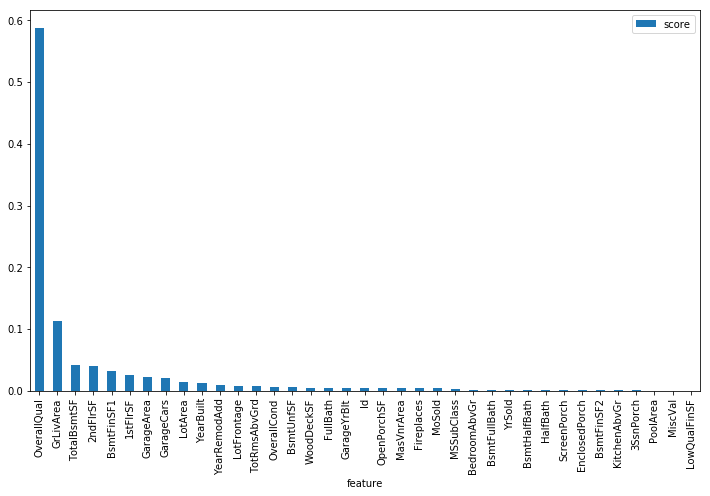

In [12]:
fimp.plot(x='feature',y='score',kind='bar',figsize=(12,7))
plt.show()

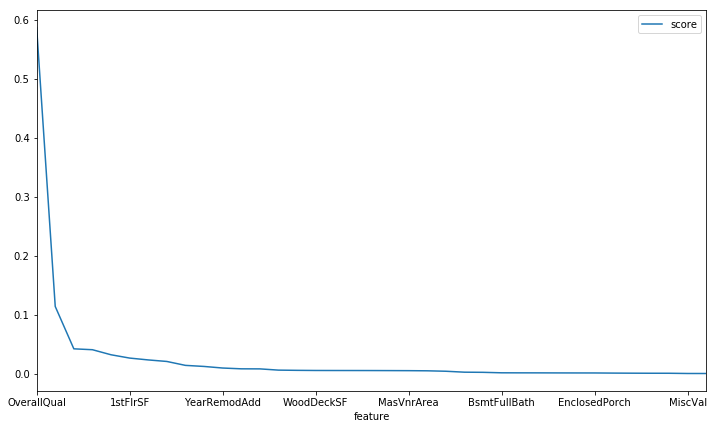

In [13]:
fimp.plot(x='feature',y='score',figsize=(12,7))
plt.show()

In [14]:
#Use columns in model with importance above 0.01
to_keep = fimp[fimp.score>0.01]
to_keep

,feature,score
0,OverallQual,0.586806
1,GrLivArea,0.113762
2,TotalBsmtSF,0.041938
3,2ndFlrSF,0.040429
4,BsmtFinSF1,0.031857
5,1stFlrSF,0.026251
6,GarageArea,0.023110
7,GarageCars,0.020514
8,LotArea,0.013871
9,YearBuilt,0.012055


In [15]:
c = []
for i in to_keep['feature']:
    c.append(i)
print(c)

['OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1', '1stFlrSF', 'GarageArea', 'GarageCars', 'LotArea', 'YearBuilt']


In [16]:
#Create new model with important columns
train_X2 = trainc[c].copy()
train_X2

,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,GarageArea,GarageCars,LotArea,YearBuilt
0,7,1710,856,854,706,856,548,2,8450,2003
1,6,1262,1262,0,978,1262,460,2,9600,1976
2,7,1786,920,866,486,920,608,2,11250,2001
3,7,1717,756,756,216,961,642,3,9550,1915
4,8,2198,1145,1053,655,1145,836,3,14260,2000
5,5,1362,796,566,732,796,480,2,14115,1993
6,8,1694,1686,0,1369,1694,636,2,10084,2004
7,7,2090,1107,983,859,1107,484,2,10382,1973
8,7,1774,952,752,0,1022,468,2,6120,1931
9,5,1077,991,0,851,1077,205,1,7420,1939


In [17]:
#Create second model with only important columns
model2 = RandomForestRegressor(n_estimators=100,min_samples_split=6,max_leaf_nodes=50,oob_score=True,n_jobs=-1)
model2.fit(train_X2,train_y)
#model2.score(train_X2,train_y)
sc = cross_val_score(model2,train_X2,train_y)
sc.mean()

0.84949153251094567

In [25]:
#Read test file
test = pd.read_csv('test.csv')

In [26]:
test_X = test[c]
test_X.fillna(test_X.median(),inplace=True)
test_X

/home/carlosluz/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,OverallQual,GrLivArea,TotalBsmtSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,GarageArea,GarageCars,LotArea,YearBuilt
0,5,896,882.0,0,468.0,896,730.0,1.0,11622,1961
1,6,1329,1329.0,0,923.0,1329,312.0,1.0,14267,1958
2,5,1629,928.0,701,791.0,928,482.0,2.0,13830,1997
3,6,1604,926.0,678,602.0,926,470.0,2.0,9978,1998
4,8,1280,1280.0,0,263.0,1280,506.0,2.0,5005,1992
5,6,1655,763.0,892,0.0,763,440.0,2.0,10000,1993
6,6,1187,1168.0,0,935.0,1187,420.0,2.0,7980,1992
7,6,1465,789.0,676,0.0,789,393.0,2.0,8402,1998
8,7,1341,1300.0,0,637.0,1341,506.0,2.0,10176,1990
9,4,882,882.0,0,804.0,882,525.0,2.0,8400,1970


In [27]:
pred_iowa = model2.predict(test_X)
pred_iowa


array([ 126547.97124315,  154116.51788624,  174747.85302124, ...,
        153139.790524  ,  116683.94199041,  231249.54017042])

In [28]:
sct = cross_val_score(model2,test_X,pred_iowa)
sct.mean()

0.97409328210342683

In [96]:
#File with pred prices

my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': pred_iowa})
# you could use any filename. We choose submission here
my_submission.to_csv('Prices2.csv', index=False)